# TD SVM 13 Novembre 2019

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

## Importer les données

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()

Description de la base de données Iris :

In [3]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [4]:
# Features name
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

## SVM à noyau linéaire

Nous allons nous limiter pour l'instant à **deux classes** : setosa et virginica, et à **deux features** (pour visualiser) : sepal length and sepal width. Nous allons entrainer une **SVM linéaire** et afficher l'hyperplan séparateur (en 2D une droite donc).

Nous allons utiliser la classe [SVC](http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC) du module svm de scikit-learn.

In [5]:
from sklearn import svm

### Q1.

In [6]:
# select data for 2 classes and 2 features
X = iris.data[iris.target!=1, :2]
print("X shape:", X.shape)
y = iris.target[iris.target!=1]
print("y shape:", y.shape)

# initialize a model
clf = svm.SVC(kernel='linear', C=1000)

# fit the model
clf.fit(X, y)

X shape: (100, 2)
y shape: (100,)


SVC(C=1000, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

Représentons l'hyperplan séparateur !

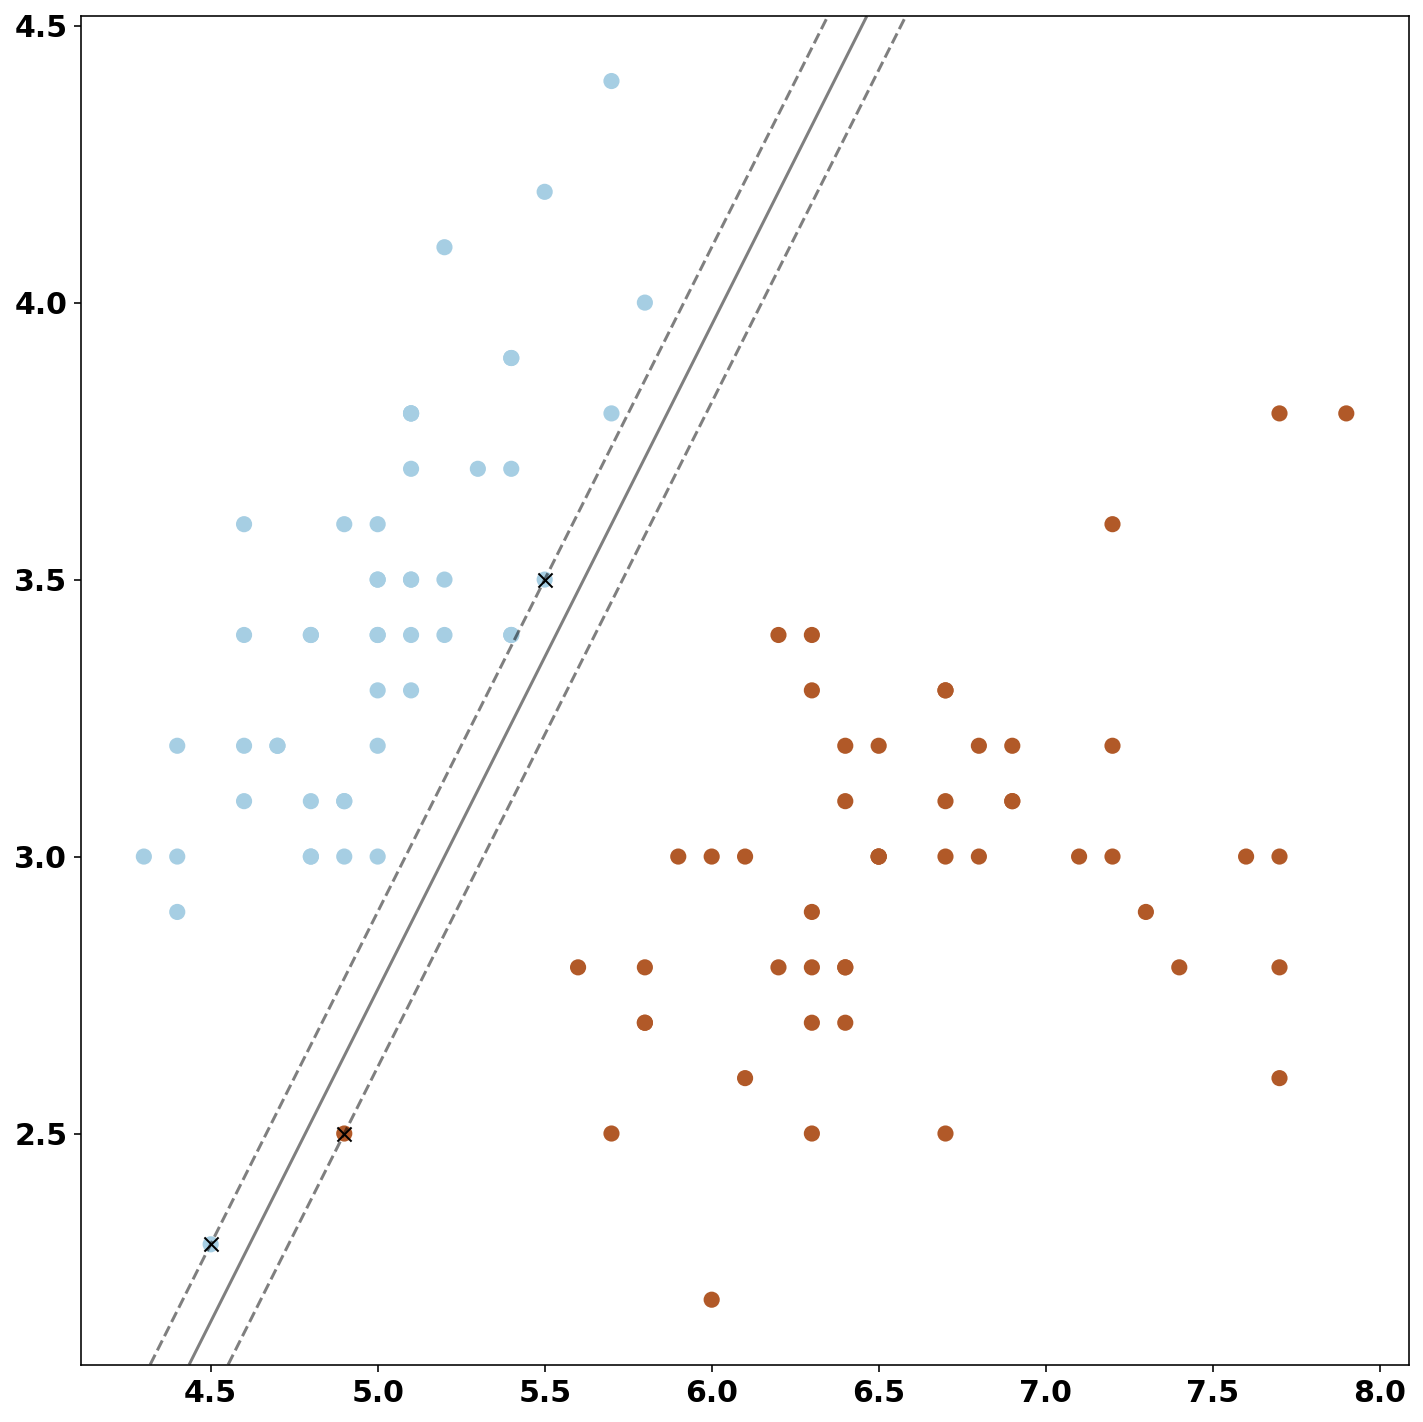

In [7]:
plt.figure(figsize=(10, 10))

# plot the point cloud
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap=plt.cm.Paired)

# get frame limits
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# visualize support vectors with a cross
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], 
           s=50, linewidth=1, marker='x', color='k')

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], 
           alpha=0.5, linestyles=['--', '-', '--'])

# format the plot
plt.xticks(fontweight="bold", fontsize=15)
plt.yticks(fontweight="bold", fontsize=15)
plt.tight_layout()

plt.show()

__Question :__ Où sont situés les vecteurs de support ?

__Réponse :__ 

### Q2.

Affichons la performance du prédicteur :

In [8]:
print(clf.score(X, y))

1.0


__Question :__ Quelle mesure de performance est calculée par `clf.score` ? Référez-vous à la [documentation](http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC.score). Que veut dire une performance de 1.0 ?

__Réponse :__

### Q3.

Considérons maintenant les deux classes Versicolour et Virginica !

In [9]:
# select data for 2 classes and 2 features
X = iris.data[iris.target!=0, :2]
print("X shape:", X.shape)
y = iris.target[iris.target!=0]
print("y shape:", y.shape)

# initialize a model
clf = svm.SVC(kernel='linear', C=1000)

# fit the model
clf.fit(X, y)

X shape: (100, 2)
y shape: (100,)


SVC(C=1000, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

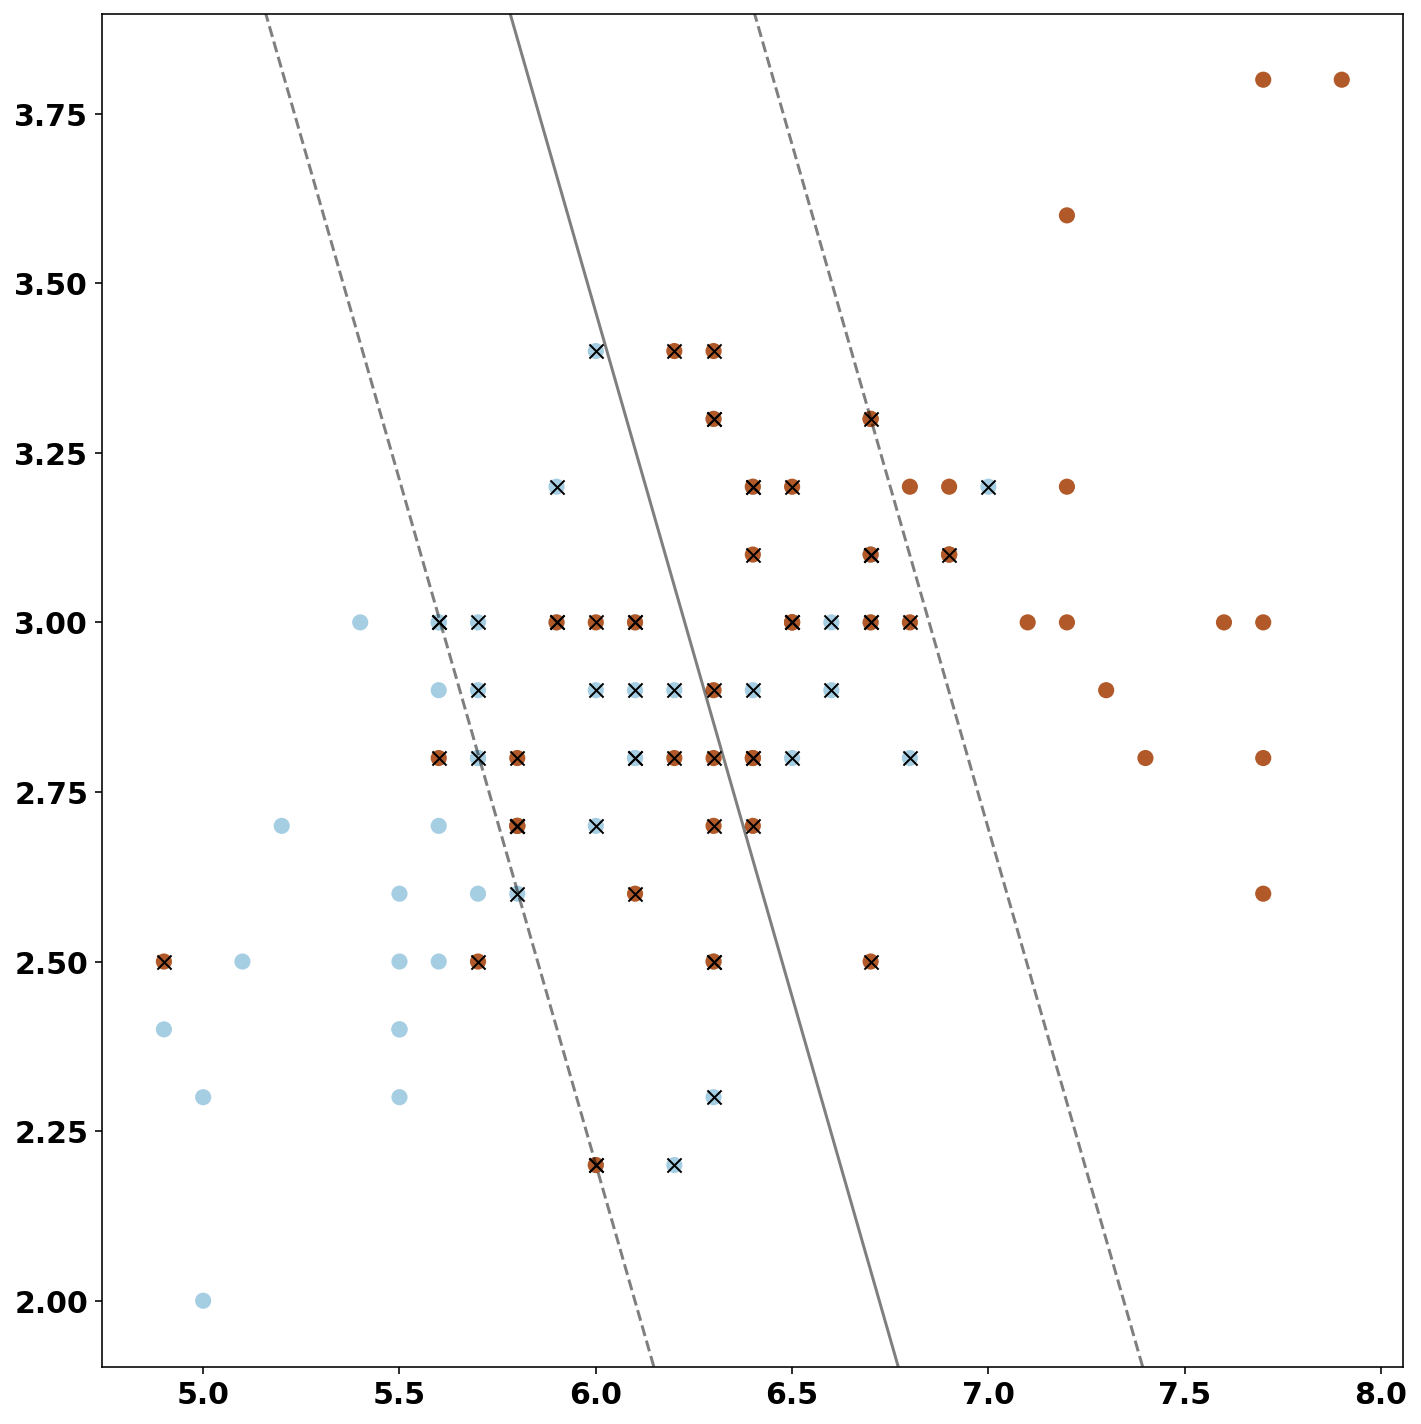

In [10]:
plt.figure(figsize=(10, 10))

# plot the point cloud
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap=plt.cm.Paired)

# get frame limits
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# visualize support vectors with a cross
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], 
           s=50, linewidth=1, marker='x', color='k')

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], 
           alpha=0.5, linestyles=['--', '-', '--'])

# format the plot
plt.xticks(fontweight="bold", fontsize=15)
plt.yticks(fontweight="bold", fontsize=15)
plt.tight_layout()

plt.show()

__Question :__ Où sont situés les vecteurs de support ?

__Réponse :__ 

Quelle est la performance de ce modèle ?

In [11]:
print(clf.score(X, y))

0.73


La performance n'est que de 0.73. Essayons d'utiliser un noyau pour avoir une séparation plus complexe et mieux coller aux données !

## SVM à noyau non linéaire

Nous allons utiliser un **noyau RBF gaussien**, pour plusieurs valeurs du paramètre gamma. En classe nous avons donné la formule du noyau gaussien :

\begin{align}
k(x, x') = \exp\bigg[-\frac{||x - x'||^2}{2 \sigma^2}\bigg]
\end{align}

### Q4.

__Question :__ À quoi correspond le paramètre gamma dans la formule du noyau gaussien ?

__Réponse :__

### Q5.

Testons différentes valeurs de gamma.

In [22]:
# select data for Versicolour and Virginica classes
X = iris.data[iris.target!=0, :2]
y = iris.target[iris.target!=0]

# gamma values
gamma_range = np.linspace(0.1, 50, 20)

for param in gamma_range:
    clf = svm.SVC(kernel='rbf', C=0.01, gamma=param)
    clf.fit(X, y)
    score = clf.score(X, y)
    print("gamma: {0:.2f} | score: {1:.2f}".format(param, score))

gamma: 0.10 | score: 0.68
gamma: 2.73 | score: 0.73
gamma: 5.35 | score: 0.69
gamma: 7.98 | score: 0.70
gamma: 10.61 | score: 0.71
gamma: 13.23 | score: 0.76
gamma: 15.86 | score: 0.76
gamma: 18.48 | score: 0.76
gamma: 21.11 | score: 0.76
gamma: 23.74 | score: 0.78
gamma: 26.36 | score: 0.78
gamma: 28.99 | score: 0.78
gamma: 31.62 | score: 0.78
gamma: 34.24 | score: 0.79
gamma: 36.87 | score: 0.80
gamma: 39.49 | score: 0.80
gamma: 42.12 | score: 0.80
gamma: 44.75 | score: 0.80
gamma: 47.37 | score: 0.80
gamma: 50.00 | score: 0.80


__Question :__ Affichez maintenant la frontière de séparation pour le dernier de ces classifieurs, qui a un score de 0.80, et donc nettement meilleur que le modèle linéaire précédent (score = 0.73).

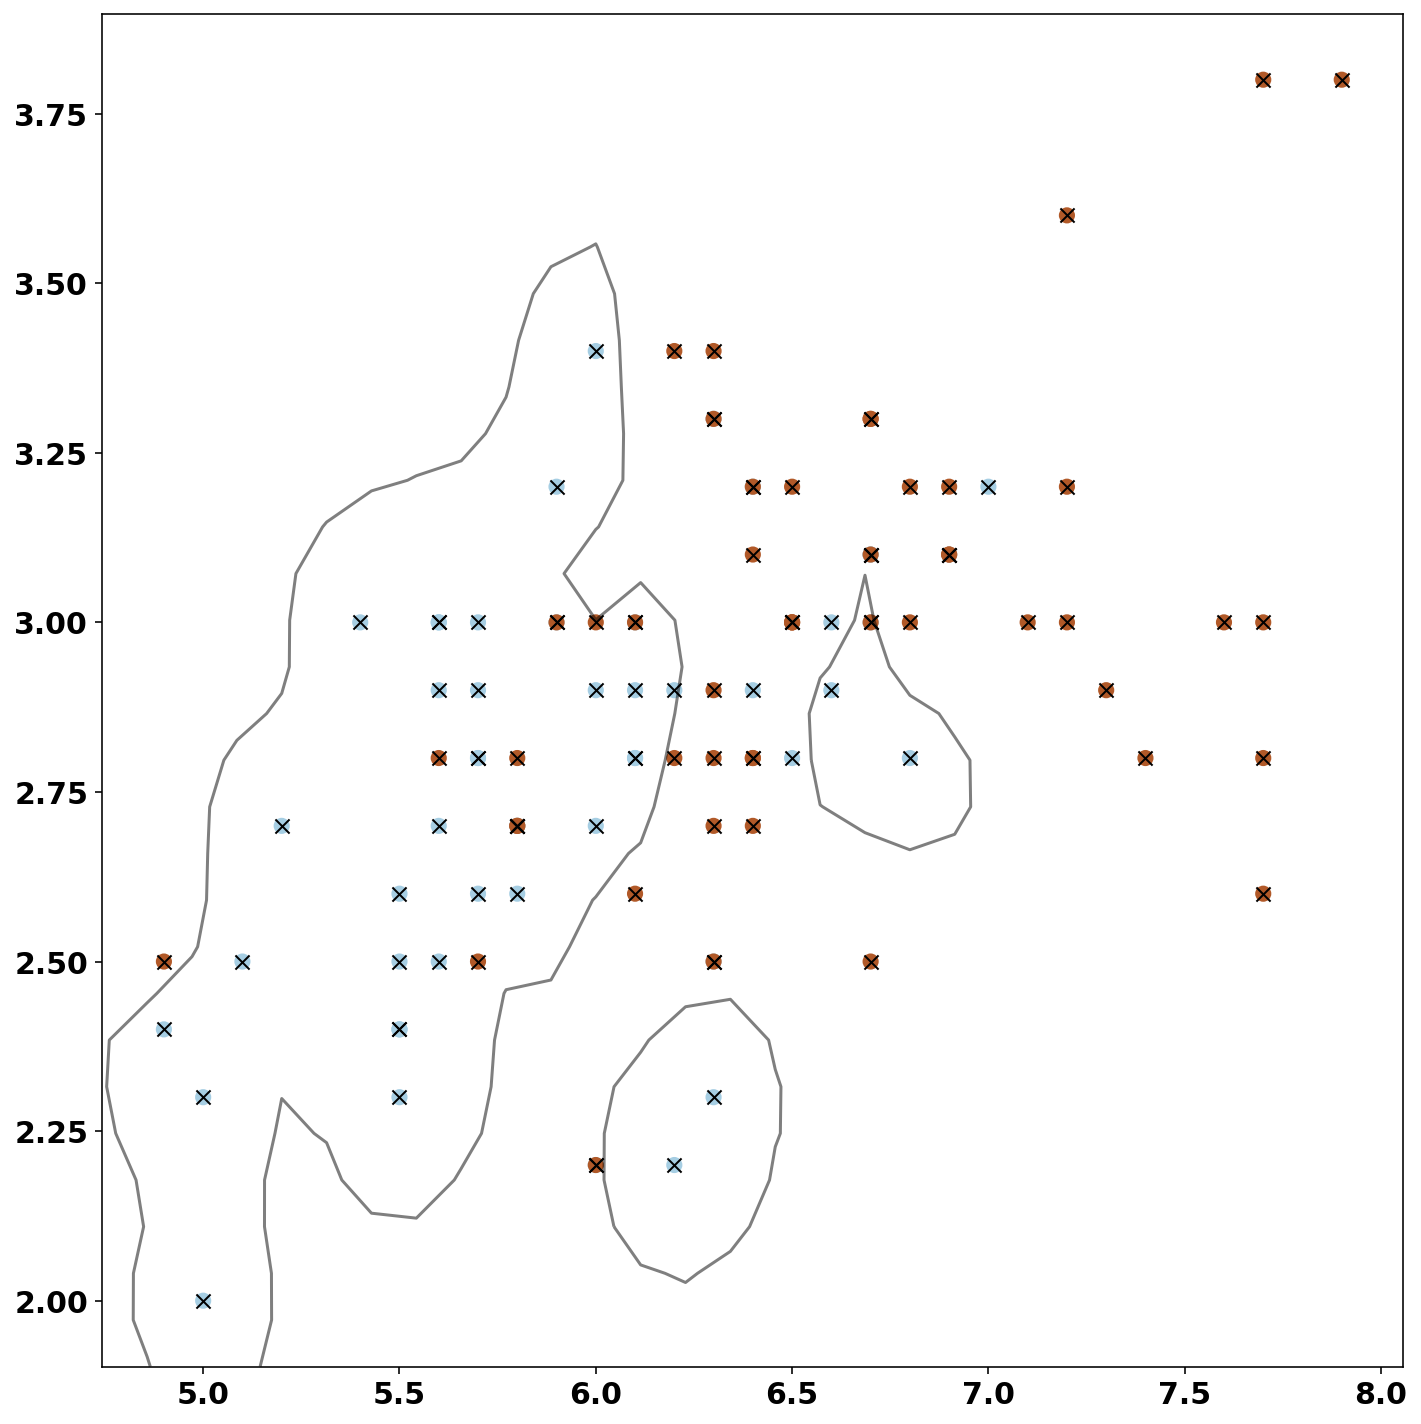

In [13]:
plt.figure(figsize=(10, 10))

# plot the point cloud
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap=plt.cm.Paired)

# get frame limits
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# visualize support vectors with a cross
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], 
           s=50, linewidth=1, marker='x', color='k')

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], 
           alpha=0.5, linestyles=['--', '-', '--'])

# format the plot
plt.xticks(fontweight="bold", fontsize=15)
plt.yticks(fontweight="bold", fontsize=15)
plt.tight_layout()

plt.show()

__Question :__ Quels points sont vecteurs de supports ? Pensez-vous que le modèle va bien généraliser ?

__Réponse :__

### Q6.

Est-ce que ce modèle se __généralise__ bien, autrement dit, sera-t-il capable de faire de bonnes prédictions sur de nouvelles données que nous n'avons pas utilisées pour le construire ? 

Pour le savoir, nous allons séparer les données en un __jeu d'entraînement__ et un __jeu de test__. Nous allons entraîner nos SVMs sur le jeu d'entraînement seulement, et mesurer leur performance sur le jeu de test. Le jeu de test, étant inconnu au moment de l'entraînement, fait figure de nouvelles données. Pour cela nous allons utiliser la fonction [train_test_split](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) de scikit-learn.

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
# split the dataset between train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=.4, 
                                                    random_state=56)

# test the performance for different values of gamma
acc_train, acc_test = list(), list()
gamma_range = np.linspace(0.1, 50, 20)
for param in gamma_range:
    clf = svm.SVC(kernel='rbf', C=0.01, gamma=param)
    clf.fit(X_train, y_train)
    acc_train.append(clf.score(X_train, y_train))
    acc_test.append(clf.score(X_test, y_test))

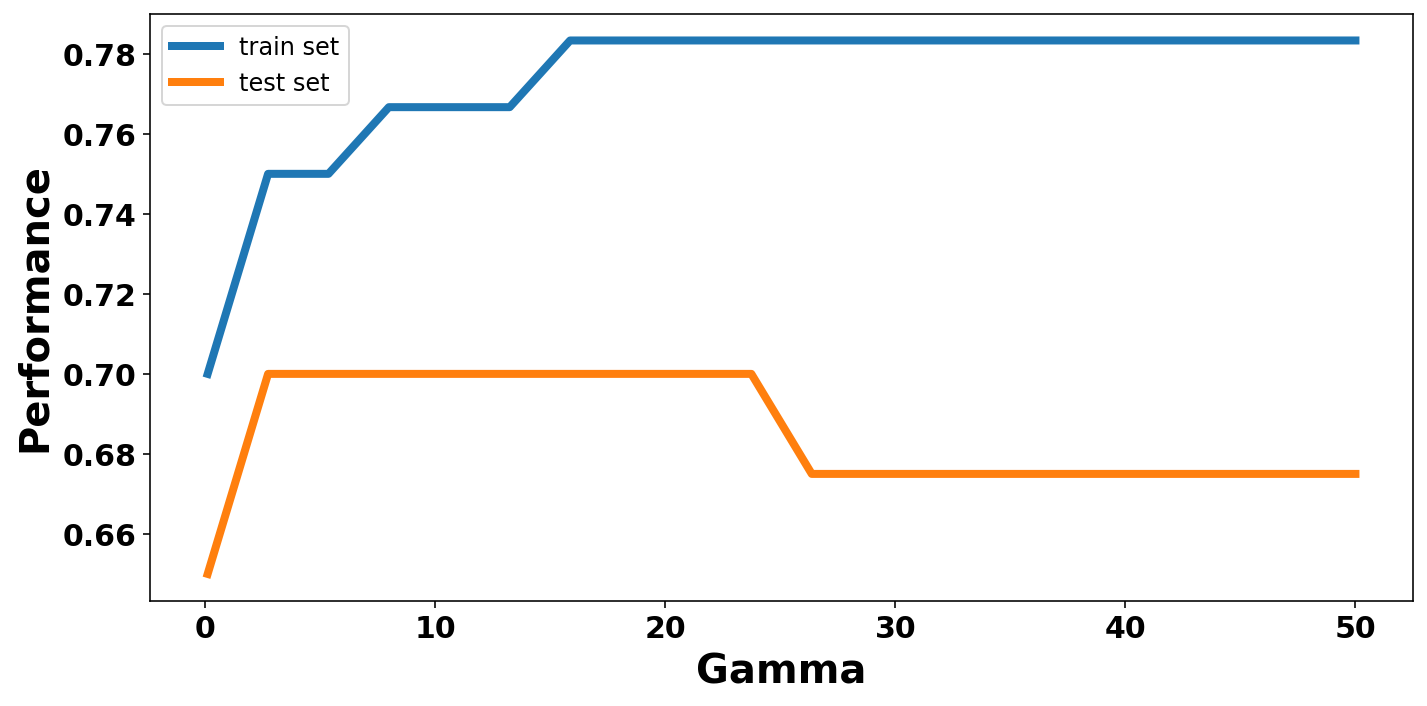

In [16]:
plt.figure(figsize=(10, 5))

# plot train and test scores for different gamma values
plt.plot(gamma_range, acc_train, label='train set', lw=4)
plt.plot(gamma_range, acc_test, label='test set', lw=4)

# add a legend
plt.legend(loc='best', fontsize=12)

# format the plot
plt.xlabel("Gamma", fontweight="bold", fontsize=20)
plt.ylabel("Performance", fontweight="bold", fontsize=20)
plt.xticks(fontweight="bold", fontsize=15)
plt.yticks(fontweight="bold", fontsize=15)
plt.tight_layout()

plt.show()

__Question :__ Observez-vous un effet de surapprentissage ? Où ? 

__Réponse :__  

### Q7.

Le graphique ci-dessus nous donne envie de prendre pour le paramètre gamma une valeur proche de 10 ou 20. Mais attention ! Si nous prenons le paramètre qui marche le mieux sur le dataset de test, nous risquons aussi de surapprendre : nous aurons alors utilisé le jeu de test pour choisir le meilleur modèle, autrement dit, nous aurons touché aux données soi-disant inconnuees lors de l'apprentissage...

Pour éviter cela, nous allons faire une __validation croisée__ (_cross-validation_) sur le jeu d'entraînement.

Nous allons pour cela utiliser la classe [GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) du module model_selection de scikit-learn.

In [17]:
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [30]:
# define a set of parameter to test
parameters = {'kernel':('linear', 'rbf'), 
              'C':[0.1, 1, 10]}

# initialize a model
svc = svm.SVC()

# initialize cross validation
clf = GridSearchCV(estimator=svc, 
                   param_grid=parameters,
                   cv=5)

# run the cross validation using train dataset
clf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.1, 1, 10], 'kernel': ('linear', 'rbf')},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

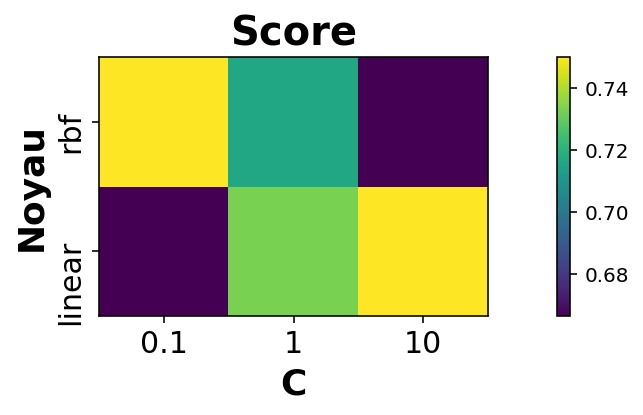

In [31]:
plt.figure(figsize=(10, 3))

# format results from gridsearch
scores = clf.cv_results_['mean_test_score'].reshape(len(parameters['kernel']), len(parameters['C']))

# plot performance scores
plt.imshow(scores, interpolation='none')
#plt.imshow(scores, interpolation='none', cmap="RdBu_r", vmin=0, vmax=1)

# add a colorbar
plt.colorbar()

# format the plot
plt.title("Score", fontweight="bold", fontsize=20)
plt.xlabel("C", fontweight="bold", fontsize=18)
plt.ylabel("Noyau", fontweight="bold", fontsize=18)
plt.ylim((-0.5, 1.5))
plt.xticks(np.arange(len(parameters['C'])), parameters['C'], fontsize=15)
plt.yticks(np.arange(len(parameters['kernel'])), parameters['kernel'], rotation=90, fontsize=15)
plt.tight_layout()

plt.show()

__Question :__ Quel est le rôle du paramètre C ? Qu'observez-vous quand C est grand ? 

__Réponse :__

## Mise en pratique

Sélectionnons les meilleurs paramètres de SVM pour la classification avec les 4 paramètres disponibles.

__Question :__ Entraînez un SVM de classification pour séparer les données sur les deux problèmes (setosa vs virginica, puis versicolor vs virginica). Entraînez votre SVM en validation croisée sur le jeu d'entraînement. Quels paramètres pouvez-vous faire varier ? Quelle est la performance de votre modèle optimal _sur le jeu de test_ ? 

### 1) Setosa vs virginica

In [ ]:
# Réponse

### 2) Versicolour et Virginica

In [27]:
parameters = {'kernel':['rbf'], 
              'C':[0.1, 1, 10]}

# initialize a model
svc = svm.SVC()

# initialize cross validation
clf = GridSearchCV(estimator=svc, 
                   param_grid=parameters,
                   cv=5)

# run the cross validation using train dataset
clf.fit(X_train, y_train)

print(clf.best_params_)
clf.cv_results_['mean_test_score']

{'C': 1, 'kernel': 'rbf'}


array([0.73333333, 0.75      , 0.66666667])

### Question bonus

__Question :__ Comment construiriez-vous un modèle multi-classe, à base de SVMs, qui assigne une nouvelle observation à une des trois classes setosa, virginica ou versicolor ?

__Réponse :__